# Extract Sample Characterisics from the RADx-rad Project

Data Characteristics
* Number of unique samples per study
* Number of unique subjects per study

Author: Peter W Rose, UC San Diego (pwrose.ucsd@gmail.com)

Data last updated: 2025-06-09

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

# Ensure plots display inline
%matplotlib inline

In [3]:
# Results directory
result_dir = "../../results"

In [4]:
df = pd.read_csv(os.path.join(result_dir, "data_elements.csv"), dtype=str)
df = df[["Id", "subproject", "phs_id", "project_num", "radx_id", "filename"]].copy()
df = df[~df['subproject'].isin(['PreVAIL kIds', 'Wastewater'])]  # exclude non-diagnostic development project

In [5]:
# Field names that contain metrics
METRIC_COLUMNS = [
    "study_id",
    "cohort_id",
    "sample_id",
    "sample_group",
    "study_id_count",
    "sample_id_count",
]

In [6]:
df = df[df["Id"].isin(METRIC_COLUMNS)]
df = df[["subproject", "phs_id", "project_num", "radx_id", "filename"]].drop_duplicates()
print(f"Number of data files with sample data: {df.shape[0]}")
df.head()

Number of data files with sample data: 197


,subproject,phs_id,project_num,radx_id,filename
0,Novel Biosensing and VOC,phs002522.v1.p1,1U01HL152410-01,rad_035_410-01,../../phs002522/rad_035_410-01_11845_Rapid1_DATA_origcopy.csv
11,Novel Biosensing and VOC,phs002522.v1.p1,1U01HL152410-01,rad_035_410-01,../../phs002522/rad_035_410-01_26243_Rapid2_DATA_origcopy.csv
22,Novel Biosensing and VOC,phs002522.v1.p1,1U01HL152410-01,rad_035_410-01,../../phs002522/rad_035_410-01_31686_Rapid1_DATA_origcopy.csv
33,Novel Biosensing and VOC,phs002522.v1.p1,1U01HL152410-01,rad_035_410-01,../../phs002522/rad_035_410-01_11845_Tidal1_DATA_origcopy.csv
44,Novel Biosensing and VOC,phs002522.v1.p1,1U01HL152410-01,rad_035_410-01,../../phs002522/rad_035_410-01_11845_Tidal2_DATA_origcopy.csv


In [7]:
def extract_data_element(df, data_elements):
    extract_list = []

    for _, row in df.iterrows():
        phs_id = row["phs_id"]
        data_file = row["filename"]

        data = pd.read_csv(data_file, dtype=str)

        # Use only data files with study or sample data
        if not (data.columns[0] == "study_id" or data.columns[0] == "sample_id"):
            continue
        data = data.reindex(columns=data_elements)
        data = data.replace("nan", pd.NA)

        data["phs_id"] = phs_id

        extract_list.append(data)

    extracted_data = pd.concat(extract_list, ignore_index=True)
    extracted_data.drop_duplicates(inplace=True)

    return extracted_data

In [8]:
cols = METRIC_COLUMNS
characteristics = extract_data_element(df, cols)
characteristics.head(100)

,study_id,cohort_id,sample_id,sample_group,study_id_count,sample_id_count,phs_id
0,11845,NaN,NaN,NaN,NaN,NaN,phs002522.v1.p1
10000,26243,NaN,NaN,NaN,NaN,NaN,phs002522.v1.p1
20000,31686,NaN,NaN,NaN,NaN,NaN,phs002522.v1.p1
50000,34343,NaN,NaN,NaN,NaN,NaN,phs002522.v1.p1
80000,25012,NaN,NaN,NaN,NaN,NaN,phs002522.v1.p1
190000,35045,NaN,NaN,NaN,NaN,NaN,phs002522.v1.p1
230000,63992,NaN,NaN,NaN,NaN,NaN,phs002522.v1.p1
240000,57123,NaN,NaN,NaN,NaN,NaN,phs002522.v1.p1
250000,36280,NaN,NaN,NaN,NaN,NaN,phs002522.v1.p1
300000,37014,NaN,NaN,NaN,NaN,NaN,phs002522.v1.p1


In [9]:
summary = (
    characteristics
    .groupby("phs_id")
    .agg(
        study_count  = ("study_id", "nunique"),
        sample_count = ("sample_id", "nunique"),
    )
    .reset_index()
)

In [10]:
summary.to_csv(os.path.join(result_dir, "data_samples.csv"), index=False)

In [11]:
summary.head(200)

,phs_id,study_count,sample_count
0,phs002522.v1.p1,16,0
1,phs002523.v1.p1,333,0
2,phs002524.v1.p1,10,36
3,phs002544.v1.p1,478,28
4,phs002546.v1.p1,0,8
5,phs002551.v1.p1,357,0
6,phs002561.v1.p1,15,12
7,phs002563.v1.p1,42,0
8,phs002570.v1.p1,12,0
9,phs002583.v1.p1,0,21


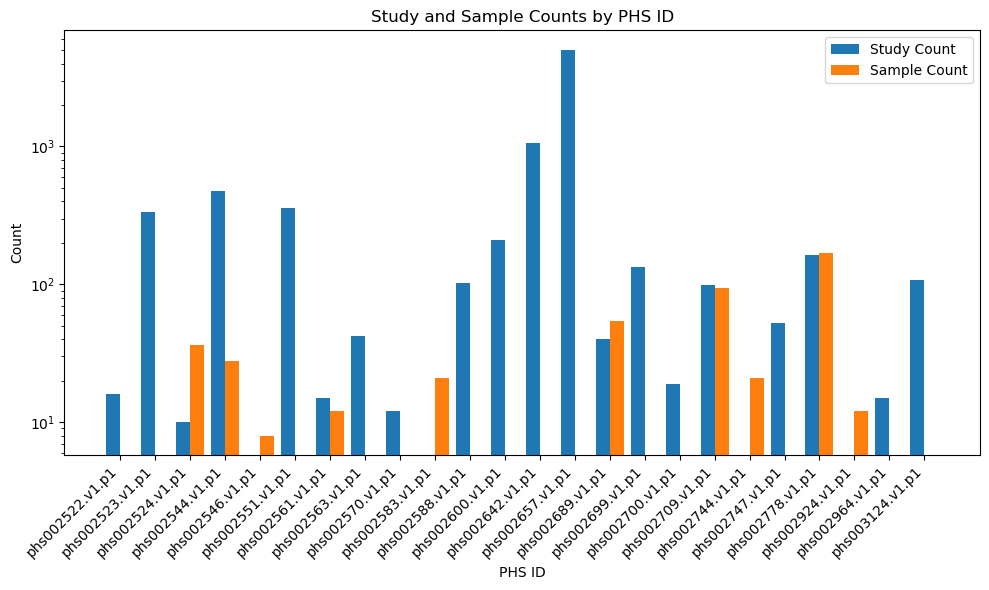

In [12]:
# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
x = range(len(summary))
bar_width = 0.4

# Plot study_count bars
ax.bar([i - bar_width / 2 for i in x], summary['study_count'], width=bar_width, label='Study Count')

# Plot sample_count bars
ax.bar([i + bar_width / 2 for i in x], summary['sample_count'], width=bar_width, label='Sample Count')

# Labels and ticks
ax.set_xlabel('PHS ID')
ax.set_ylabel('Count')
ax.set_title('Study and Sample Counts by PHS ID')
ax.set_xticks(x)
ax.set_xticklabels(summary['phs_id'], rotation=45, ha='right')
ax.legend()
ax.yaxis.get_major_locator().set_params(integer=True)
ax.set_yscale('log')

plt.tight_layout()
plt.show()
